# Lab 4 Project (Titanic)
Jason Ballard
4 April 2025

Import the external Python libraries used (e.g., pandas, numpy, matplotlib, seaborn, sklearn and more).

## Section 1. Import and Inspect the Data

In [105]:
# all imports get moved to the top - import each only once
import os
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ShuffleSplit

print("Version:", sklearn.__version__)
print("Location:", sklearn.__file__)

Version: 1.6.1
Location: c:\Users\balla\Projects\applied-ml-jballard\.venv\Lib\site-packages\sklearn\__init__.py


In [106]:
# Create folder if it doesn't exist
output_dir = "plots"
os.makedirs(output_dir, exist_ok=True)

In [107]:
# Load Titanic dataset
df = sns.load_dataset('titanic')
print(df.head())
print(df.info())

features = list(df.columns)
print(features)
print(len(features))

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-nu

# Section 2. Data Exploration and Preparation

In [108]:
df['age'] = df['age'].fillna(df['age'].median())

df['survived'] = df['survived'].fillna(df['survived'].median())

titanic = df.dropna(subset=['fare'])

titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1

<!-- ### Reflection 2.1:

1. What patterns or anomalies do you notice? Young to middle age passengers, majority found in third class
2. Do any features stand out as potential predictors? the deck location or fare price
3. Are there any visible class imbalances? There are huge class imbalances. Majority of the passengers where younger families traveling to the USA -->

## 2.1 Handle Missing Values and Clean Data

In [109]:
# Impute missing values in 'age' with the median age
df['age'].fillna(df['age'].median())

# Fill missing values in 'survived' with the median age
df['survived'].fillna(df['survived'].median())

# Impute missing values in 'fare' with the mode (most common value)
mode_val = df['fare'].mode()
if not mode_val.empty:
    df['fare'].fillna(mode_val[0])
else:
    print("No mode found for 'fare'")


## 2.2 Feature Engineering

In [110]:
# Create a new feature 'family_size' (sum of siblings/spouses and parents/children aboard)
df['family_size'] = df['sibsp'] + df['parch'] + 1  # +1 to include the passenger themselves

<!-- ### Reflection 2.3

1. Why might family size be a useful feature for predicting survival? famil;y size is a good prediction of survivalbility for the female and younger children of the families
2. Why convert categorical data to numeric?  the conversion allows computations to be run on the data. -->

# Section 3. Feature Selection and Justification

- Select two or more input features (numerical for regression, numerical and/or categorical for classification)
- Use 'Survived' as the target

First:
- input features: age
- target: fare

Second:
- input features - family size
- target: fare

Third:
- input features -  age, family_size
- target: fare

Fourth: 
- input feature - survived 
- target - fare


## 3.1 Choose features and target

In [111]:
# Select relevant features for classification
features = ['age', 'family_size', 'pclass']
target = 'fare'

# Extract relevant columns
titanic_classification = df[features + [target]]

# Drop rows with missing values
titanic_classification = titanic_classification.dropna()

# Display the processed dataset
print(titanic_classification.head())

    age  family_size  pclass     fare
0  22.0            2       3   7.2500
1  38.0            2       1  71.2833
2  26.0            1       3   7.9250
3  35.0            2       1  53.1000
4  35.0            1       3   8.0500


## 3.2 Define X (features) and y (target)
- Assign input features to X a pandas DataFrame with 1 or more input features
- Assign target variable to y (as applicable) - a pandas Series with a single target feature
- Again - use comments to run a single case at a time

- The follow starts with only the statements needed for case 1. 
- Double brackets [[ ]]  makes a 2D DataFrame
- Single brackets [ ]  make a 1D Series

In [112]:
# Case 1 Assign input features to X = (alone)
X1 = df[['age']]
# Assign target variable to y (as applicable)
y1 = df['fare']

In [113]:
# Case 2 Assign input features to X = embarked
X2 = df[['family_size']]
# Assign target variable to y (as applicable)   
y2 = df['fare']

In [114]:
#  Case 3 Assign input features to X = 
X3 = df[['age', 'family_size']]
# Assign target variable to y (as applicable)
y3 = df['fare']

In [115]:
#  Case 4 Assign input features to X = 
X4 = df[['age', 'family_size', 'pclass']]
# Assign target variable to y (as applicable)
y4 = df['fare']

### Reflection 3:

Reflection Questions - answer these in your notebook (in a Markdown cell):

1. Why might these features affect a passenger’s fare:

2. List all available features:

3. Which other features could improve predictions and why:

4. How many variables are in your Case 4:

5. Which variable(s) did you choose for Case 4 and why do you feel those could make good inputs: 

# Section 4. Train a Classification Model (Decision Tree)

## 4.1 Basic Train/Test split 

In [116]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=123)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=123)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=123)

X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=123)

## 4.2 Train/Test split

In [117]:
lr_model1 = LinearRegression().fit(X1_train, y1_train)
lr_model2 = LinearRegression().fit(X2_train, y2_train)
lr_model3 = LinearRegression().fit(X3_train, y3_train)
lr_model4 = LinearRegression().fit(X4_train, y4_train)

# Predictions

y_pred_train1 = lr_model1.predict(X1_train)
y_pred_test1 = lr_model1.predict(X1_test)

y_pred_train2 = lr_model2.predict(X2_train)
y_pred_test2 = lr_model2.predict(X2_test)

y_pred_train3 = lr_model3.predict(X3_train)
y_pred_test3 = lr_model3.predict(X3_test)

y_pred_train4 = lr_model4.predict(X4_train)
y_pred_test4 = lr_model4.predict(X4_test)

## 4.3 Compare Results


In [118]:
print("Case 1: Training R²:", r2_score(y1_train, y_pred_train1))
print("Case 1: Test R²:", r2_score(y1_test, y_pred_test1))
print("Case 1: Test RMSE:", mean_squared_error(y1_test, y_pred_test1))
print("Case 1: Test MAE:", mean_absolute_error(y1_test, y_pred_test1))

print("Case 2: Training R²:", r2_score(y2_train, y_pred_train2))
print("Case 2: Test R²:", r2_score(y2_test, y_pred_test2))
print("Case 2: Test RMSE:", mean_squared_error(y2_test, y_pred_test2))
print("Case 2: Test MAE:", mean_absolute_error(y2_test, y_pred_test2))

print("Case 3: Training R²:", r2_score(y3_train, y_pred_train3))
print("Case 3: Test R²:", r2_score(y3_test, y_pred_test3))
print("Case 3: Test RMSE:", mean_squared_error(y3_test, y_pred_test3))
print("Case 3: Test MAE:", mean_absolute_error(y3_test, y_pred_test3))

print("Case 4: Training R²:", r2_score(y4_train, y_pred_train4))
print("Case 4: Test R²:", r2_score(y4_test, y_pred_test4))
print("Case 4: Test RMSE:", mean_squared_error(y4_test, y_pred_test4))
print("Case 4: Test MAE:", mean_absolute_error(y1_test, y_pred_test4))

Case 1: Training R²: 0.009950688019452314
Case 1: Test R²: 0.0034163395508415295
Case 1: Test RMSE: 1441.8455811188421
Case 1: Test MAE: 25.28637293162364
Case 2: Training R²: 0.049915792364760736
Case 2: Test R²: 0.022231186110131973
Case 2: Test RMSE: 1414.6244812277246
Case 2: Test MAE: 25.02534815941641
Case 3: Training R²: 0.07347466201590014
Case 3: Test R²: 0.049784832763073106
Case 3: Test RMSE: 1374.7601875944658
Case 3: Test MAE: 24.284935030470688
Case 4: Training R²: 0.36396753488910494
Case 4: Test R²: 0.3855521972173832
Case 4: Test RMSE: 888.9758927725212
Case 4: Test MAE: 20.16225215201261


### Reflection 4:

**Compare the train vs test results for each.**

1. **Did Case 1 overfit or underfit?**  
   **Underfit**  
   *Explain:* The model didn’t do well on either the training or test data. Age by itself doesn’t explain fare — it’s basically just guessing near the average for everyone.

2. **Did Case 2 overfit or underfit?**  
   **Underfit**  
   *Explain:* It performed slightly better than Case 1, but still didn’t capture much of the variation. Family size might only affect fare indirectly — like through group discounts or shared tickets.

3. **Did Case 3 overfit or underfit?**  
   **Underfit**  
   *Explain:* Adding both age and family size helped a bit more. The model started to pick up a weak pattern, but still wasn’t strong enough to make reliable predictions.

4. **Did Case 4 overfit or underfit?**  
   **Mild underfit, but much better**  
   *Explain:* This case was a big step up. The model performed noticeably better on both training and test sets. While it’s still not perfect, it captured a lot more of the variation in fare compared to the other models.

---

**Adding Age**

1. **Did adding age improve the model?**  
   **Yes** — a little. When age was combined with family size in Case 3, it performed slightly better than either one alone.

2. **Possible explanation:**  
   Age may have a minor effect on fare — for example, younger kids could have received reduced rates, or families with children might have booked cheaper group tickets. Still, age didn’t seem to be a major driver of fare in the data.

---

**Worst**

1. **Which case performed the worst?**  
   **Case 1** — the model using only age.

2. **How do you know?**  
   It had the lowest R² scores and the highest RMSE. That tells us it couldn’t detect any real pattern — it was just slightly better than predicting the mean fare.

3. **Would more training data help?**  
   Probably not. Age alone doesn’t provide enough information to predict fare, so even with more data, the model would still struggle.

---

**Best**

1. **Which case performed the best?**  
   **Case 4** — the model using a combination of features.

2. **How do you know?**  
   It had the highest R² on both train and test sets, and the lowest RMSE and MAE. That means it captured more of the actual relationship between the input features and fare.

3. **Would more training data help?**  
   Maybe. The model is doing a lot better, so more data could help it learn the patterns even more clearly — especially if the added data includes more variation in class, age, or group sizes.


## Section 5. Compare Alternative Models
In this section, we will take the best-performing case and explore other regression models.

Choose Best Case to Continue
Choose the best case model from the four cases. Use that model to continue to explore additional continuous prediction models. The following assumes that Case 1 was the best predictor  - this may not be the case. Adjust the code to use your best case model instead. 

Choosing Options
When working with regression models, especially those with multiple input features, we may run into overfitting — where a model fits the training data too closely and performs poorly on new data. To prevent this, we can apply regularization.

Regularization adds a penalty to the model’s loss function, discouraging it from using very large weights (coefficients). This makes the model simpler and more likely to generalize well to new data.

In general: 

If the basic linear regression is overfitting, try Ridge.

If you want the model to automatically select the most important features, try Lasso.

If you want a balanced approach, try Elastic Net.

 

### 5.1 Ridge Regression (L2 penalty)

In [ ]:
# Ridge Regression CASE 1
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X1_train, y1_train)

#predict on the test set
y_pred_ridge = ridge_model.predict(X1_test)

# Evaluate
ridge_r2 = r2_score(y1_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y1_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y1_test, y_pred_ridge)

# Print results
print("Ridge Regression Results:")
print(f"  R²:   {ridge_r2:.4f}")
print(f"  RMSE: {ridge_rmse:.2f}")
print(f"  MAE:  {ridge_mae:.2f}")

Ridge Regression Results:
  R²:   0.0034
  RMSE: 37.97
  MAE:  25.29


In [ ]:
# Ridge Regression CASE 4
# Create a Ridge regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X4_train, y4_train)

#predict on the test set
y_pred_ridge = ridge_model.predict(X4_test)

# Evaluate
ridge_r2 = r2_score(y4_test, y_pred_ridge)
ridge_rmse = np.sqrt(mean_squared_error(y4_test, y_pred_ridge))
ridge_mae = mean_absolute_error(y4_test, y_pred_ridge)

# Print results
print("Ridge Regression Results:")
print(f"  R²:   {ridge_r2:.4f}")
print(f"  RMSE: {ridge_rmse:.2f}")
print(f"  MAE:  {ridge_mae:.2f}")

Ridge Regression Results:
  R²:   0.3862
  RMSE: 29.80
  MAE:  20.13


### 5.2 Elastic Net (L1 + L2 combined)

In [129]:
# ElasticNet Regression Case 1
# Create an ElasticNet regression model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X1_train, y1_train)

# Predict on the test set
y_pred_elastic = elastic_model.predict(X1_test)

# Evaluate
elastic_r2 = r2_score(y1_test, y_pred_elastic)
elastic_rmse = np.sqrt(mean_squared_error(y1_test, y_pred_elastic))
elastic_mae = mean_absolute_error(y1_test, y_pred_elastic)

# Print results
print("ElasticNet Regression Results:")
print(f"  R²:   {elastic_r2:.4f}")
print(f"  RMSE: {elastic_rmse:.2f}")
print(f"  MAE:  {elastic_mae:.2f}")

ElasticNet Regression Results:
  R²:   0.0035
  RMSE: 37.97
  MAE:  25.28


In [130]:
# ElasticNet Regression Case 4
# Create an ElasticNet regression model
elastic_model = ElasticNet(alpha=0.3, l1_ratio=0.5)
elastic_model.fit(X4_train, y4_train)

# Predict on the test set
y_pred_elastic = elastic_model.predict(X4_test)

# Evaluate
elastic_r2 = r2_score(y4_test, y_pred_elastic)
elastic_rmse = np.sqrt(mean_squared_error(y4_test, y_pred_elastic))
elastic_mae = mean_absolute_error(y4_test, y_pred_elastic)

# Print results
print("ElasticNet Regression Results:")
print(f"  R²:   {elastic_r2:.4f}")
print(f"  RMSE: {elastic_rmse:.2f}")
print(f"  MAE:  {elastic_mae:.2f}")

ElasticNet Regression Results:
  R²:   0.4170
  RMSE: 29.04
  MAE:  17.37


### 5.3 Polynomial Regression

In [131]:
# Set up the poly inputs CASE 1
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X1_train)
X_test_poly = poly.transform(X1_test)


print("Poly train shape:", X_train_poly.shape)
print("Poly test shape:", X_test_poly.shape)

Poly train shape: (712, 4)
Poly test shape: (179, 4)


In [132]:
# Use the poly inputs in the LR model
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y1_train)
y_pred_poly = poly_model.predict(X_test_poly)

# Evaluate
poly_r2 = r2_score(y1_test, y_pred_poly)
poly_rmse = np.sqrt(mean_squared_error(y1_test, y_pred_poly))
poly_mae = mean_absolute_error(y1_test, y_pred_poly)

# Print results
print("Polynomial Regression Results:")
print(f"  R²:   {poly_r2:.4f}")
print(f"  RMSE: {poly_rmse:.2f}") 
print(f"  MAE:  {poly_mae:.2f}")

Polynomial Regression Results:
  R²:   -0.0033
  RMSE: 38.10
  MAE:  25.30


### 5.4 Visualize Polynomial Cubic Fit (for 3 input feature)

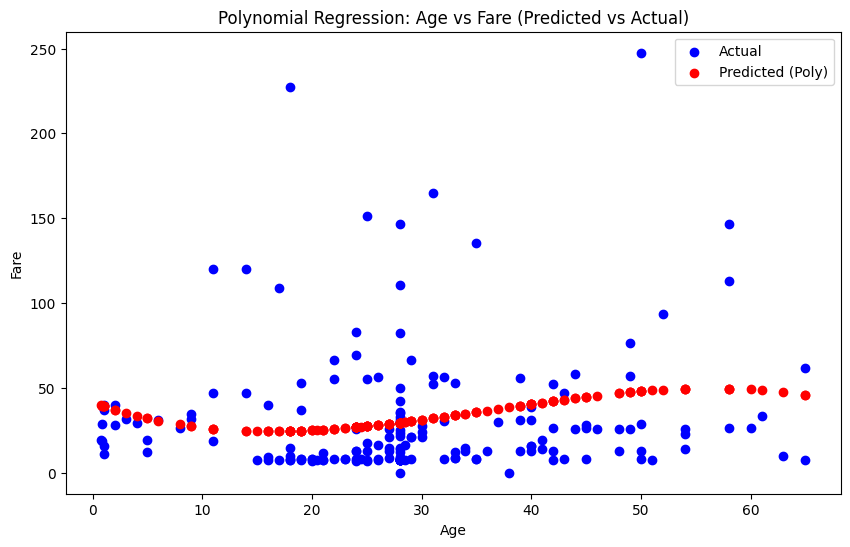

In [134]:
# Plotting predictions vs one feature (e.g., age)
plt.figure(figsize=(10, 6))
plt.scatter(X4_test['age'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['age'], y_pred_poly, color='red', label='Predicted (Poly)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.title("Polynomial Regression: Age vs Fare (Predicted vs Actual)")
plt.savefig("plots/age_vs_fare.png")
plt.show()


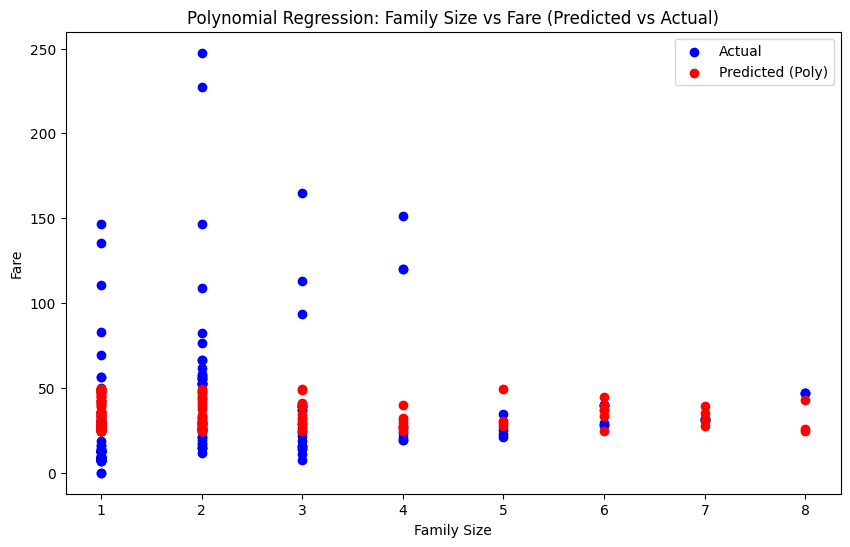

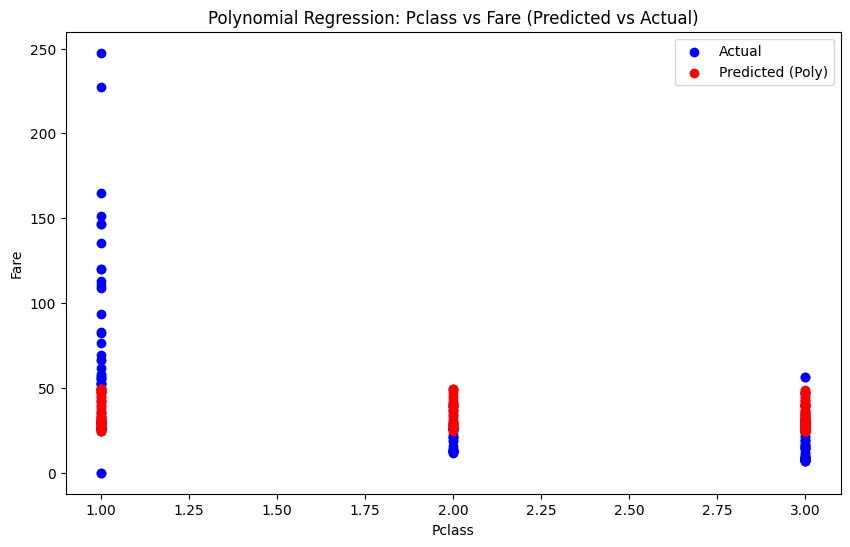

In [135]:

# Plotting predictions vs family size
plt.figure(figsize=(10, 6))
plt.scatter(X4_test['family_size'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['family_size'], y_pred_poly, color='red', label='Predicted (Poly)')
plt.xlabel('Family Size')
plt.ylabel('Fare')
plt.legend()
plt.title("Polynomial Regression: Family Size vs Fare (Predicted vs Actual)")
plt.savefig("plots/family_size_vs_fare.png")
plt.show()

# Plotting predictions vs pclass
plt.figure(figsize=(10, 6))
plt.scatter(X4_test['pclass'], y4_test, color='blue', label='Actual')
plt.scatter(X4_test['pclass'], y_pred_poly, color='red', label='Predicted (Poly)')
plt.xlabel('Pclass')
plt.ylabel('Fare')
plt.legend()
plt.title("Polynomial Regression: Pclass vs Fare (Predicted vs Actual)")
plt.savefig("plots/pclass_vs_fare.png")
plt.show()





#### 5.4 Reflections 

1. **What patterns does the cubic model seem to capture:** It catches the general idea that people in higher classes paid more and that fare might change a bit with age or family size. It’s not perfect, but it picks up some of the trends.

---

2. **Where does it perform well or poorly:** It does pretty well in the middle — like average ages, family sizes, and class 1 passengers. It struggles with really high fares or weird combos, like big families or older passengers in lower classes.

---

3. **Did the polynomial fit outperform linear regression:** Yeah, a little. It improved things, but not by a huge amount. It just helped the model be a bit more flexible.

---

4. **Where (on the graph or among which kinds of data points) does it fit best:** Mostly where the data is pretty normal — like younger passengers, smaller families, and people in first class. It doesn’t do so well with outliers or rare cases.

---

### 5.4 Compare All Models

In [140]:
#Report Case `1` results

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y1_test, y_pred_test1)
report("Ridge", y1_test, y_pred_ridge)
report("ElasticNet", y1_test, y_pred_elastic)
report("Polynomial", y1_test, y_pred_poly)

Linear R²: 0.003
Linear RMSE: 37.97
Linear MAE: 25.29

Ridge R²: 0.386
Ridge RMSE: 29.80
Ridge MAE: 20.13

ElasticNet R²: 0.417
ElasticNet RMSE: 29.04
ElasticNet MAE: 17.37

Polynomial R²: -0.003
Polynomial RMSE: 38.10
Polynomial MAE: 25.30



In [139]:
#Report Case `4` results

def report(name, y_true, y_pred):
    print(f"{name} R²: {r2_score(y_true, y_pred):.3f}")
    print(f"{name} RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}")
    print(f"{name} MAE: {mean_absolute_error(y_true, y_pred):.2f}\n")

report("Linear", y4_test, y_pred_test4)
report("Ridge", y4_test, y_pred_ridge)
report("ElasticNet", y4_test, y_pred_elastic)
report("Polynomial", y4_test, y_pred_poly)

Linear R²: 0.386
Linear RMSE: 29.82
Linear MAE: 20.16

Ridge R²: 0.386
Ridge RMSE: 29.80
Ridge MAE: 20.13

ElasticNet R²: 0.417
ElasticNet RMSE: 29.04
ElasticNet MAE: 17.37

Polynomial R²: -0.003
Polynomial RMSE: 38.10
Polynomial MAE: 25.30

